In [34]:
import networkx as nx
import numpy as np

import itertools
from collections import defaultdict

import random
import matplotlib.pyplot as plt


In [2]:
"""
finding adjacency list from graph
"""
def adjList(graph):
    adjList = [[] for _ in range(graph.number_of_nodes())]
    for (src, dest) in graph.edges():
        adjList[src].append(dest)
        adjList[dest].append(src)
    return adjList

"""
finding all hamiltonian paths from a starting vertex, requires adjacency list
"""
def hampath(graph, v, visited, path, c):
    n = graph.number_of_nodes()
    
    if len(path) == n:
        c.extend(path)
#         print(path)
        return
    
    adj_list = adjList(graph)
    
    for w in adj_list[v]:
        if not visited[w]:
            visited[w] = True
            path.append(w)

            hampath(graph, w, visited, path, c)

            visited[w] = False
            path.pop()
"""
finding all hamiltonian paths from starting from all possible vertices, requires adjacency list
"""
def findallHamPaths(graph):
    n = graph.number_of_nodes()
    allpaths = []
    for startV in range(n):
        path = [startV]
        c = []
        visited = [False] * n
        visited[startV] = True
        
        hampath(graph, startV, visited, path, c)
        final = [c[i * n:(i + 1) * n] for i in range((len(c) + n - 1) // n )]
        allpaths.append(final)
        allpathsflat = [item for sublist in allpaths for item in sublist]
    return allpathsflat

In [78]:
#creating song_dict
# fullsong_dict = {0: {"BPM": bpm_list[0]}, 1: {"BPM": bpm_list[1]}, 2: {"BPM": bpm_list[2]}, 3: {"BPM": bpm_list[3]}}
"""
creating dict of dicts of "songs" & attributes
"""
i_n = 5
i_list = list(range(nn))
bpm_label = list(["BPM"] * nn)
i_bpm = random.sample(range(80,200), nn)

dic1 = defaultdict(dict)
for x,y,z in zip(i_list, bpm_label, i_bpm):
    dic1[x][y] = z

song_dict = dict(dic1)
print(song_dict)

{0: {'BPM': 189}, 1: {'BPM': 154}, 2: {'BPM': 149}, 3: {'BPM': 116}, 4: {'BPM': 150}}


[0, 1, 2, 3, 4]
189


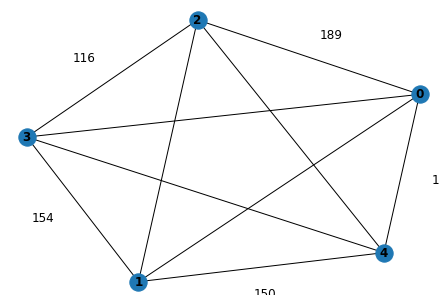

In [79]:
"""
creating and showing graph of song index & bpm
"""
sd_i = list(song_dict.keys())

print(sd_i)

g1 = nx.Graph()
g1.add_nodes_from(sd_i)
g1.add_edges_from(itertools.combinations(sd_i, 2))
nx.set_node_attributes(g1, song_dict)

print(g1.nodes[0]["BPM"])

pos = nx.spring_layout(g1)
nx.draw(g1, with_labels=True, font_weight='bold')
node_labels = nx.get_node_attributes(g1,'BPM')
nx.draw_networkx_labels(g1, pos,labels = node_labels)
plt.show()



In [87]:
"""
finding all hamiltonian paths 

(for fully connected graph should be n!)
"""
allpaths = findallHamPaths(g1)

#show first 30 paths
allpaths[:30]

#print number of paths
print(len(allpaths))


120


In [77]:
"""
parse through paths

for this, took the difference in bpm between consecutive songs

if all the bpm differences were small (<=20), return them
"""
good_p = []
for p in allpaths:
    p_bpm = [g1.nodes[i]['BPM'] for i in p]
    p_bpmdiff = abs(np.diff(p_bpm))
    if all(i <=20 for i in p_bpmdiff)==True:
        good_p.append(p)
        print(p, p_bpm)

[0, 1, 3, 2, 4] [102, 110, 118, 132, 131]
[0, 1, 3, 4, 2] [102, 110, 118, 131, 132]
[1, 0, 3, 2, 4] [110, 102, 118, 132, 131]
[1, 0, 3, 4, 2] [110, 102, 118, 131, 132]
[2, 4, 3, 0, 1] [132, 131, 118, 102, 110]
[2, 4, 3, 1, 0] [132, 131, 118, 110, 102]
[4, 2, 3, 0, 1] [131, 132, 118, 102, 110]
[4, 2, 3, 1, 0] [131, 132, 118, 110, 102]
